Testing QITE on the hamiltonian:
$$H = \begin{pmatrix} 1 & 0 \\ 0 & i\end{pmatrix} = \frac{1+i}{2} I + \frac{1-i}{2} Z $$
with start state
$$|\psi(0)\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}}$$

I expect the state
$$ |\psi(t)\rangle = e^{-Ht}|\psi(0)\rangle = \frac{e^{-t}}{\sqrt{2}} |0\rangle + \frac{e^{-it}}{\sqrt{2}}|1\rangle $$

In [111]:
import numpy as np
from ideal_qite import qite, CP_IMPORT_FLAG
from qite_params import DRIFT_NONE, QITE_params
from log_data import log_data, plot_data

from qiskit import Aer
from qiskit.quantum_info import Statevector

db = 0.1
delta= 0.0
N = 30
nbits = 1
D = 1

# Hamiltonian Description
hm = [ [0, 3], np.array([1+1j, 1-1j], dtype=complex)/2, [0] ]
hm_list = [hm]

h_name = 'Simpe Non-Hermitian'

drift_type= DRIFT_NONE
gpu_solver_flag = False
gpu_simulator_flag = False

sv_sim = Aer.get_backend('statevector_simulator')

init_circ = None
init_sv = Statevector(np.array([1,1])/np.sqrt(2))

log_path = './qite_logs/non-hermit/'
fig_path = './figs/non-hermit'
run_name = 'run'
run_id = '001'

params = QITE_params()
params.load_hamiltonian_params(hm_list, nbits, D)
params.set_run_params(db, delta, N, 0, sv_sim, init_circ, init_sv)
params.set_identifiers(log_path, fig_path, run_name)

E,times,statevectors, alist = qite(params)

Loading Hamiltonian Parameters... Done
Calculating Unitary Domains... Done
Calculating Required Odd-Y Pauli Strings... Done
Calculating Required Pauli Measurements... Done
Starting Ideal QITE Simulation:
Iteration 1... Done -- Iteration time = 0.08 seconds
Iteration 2... Done -- Iteration time = 0.08 seconds
Iteration 3... Done -- Iteration time = 0.14 seconds
Iteration 4... Done -- Iteration time = 0.08 seconds
Iteration 5... Done -- Iteration time = 0.09 seconds
Iteration 6... Done -- Iteration time = 0.07 seconds
Iteration 7... Done -- Iteration time = 0.08 seconds
Iteration 8... Done -- Iteration time = 0.10 seconds
Iteration 9... Done -- Iteration time = 0.07 seconds
Iteration 10... Done -- Iteration time = 0.07 seconds
Iteration 11... Done -- Iteration time = 0.07 seconds
Iteration 12... Done -- Iteration time = 0.09 seconds
Iteration 13... Done -- Iteration time = 0.08 seconds
Iteration 14... Done -- Iteration time = 0.10 seconds
Iteration 15... Done -- Iteration time = 0.06 sec

In [116]:
import hamiltonians
hamiltonians.get_matrix(hm_list, 1)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

<Figure size 432x288 with 0 Axes>

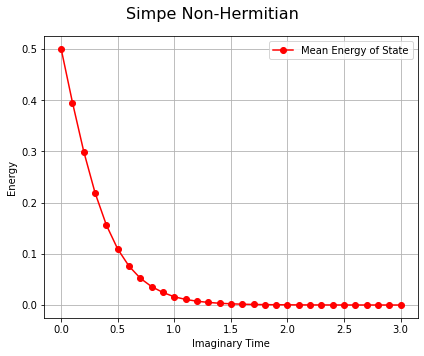

In [80]:
plot_data(h_name, run_id, params, E, statevectors, gs_flag=False, prob_flag=False)

In [81]:
statevectors[:,0].shape

(31,)

C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


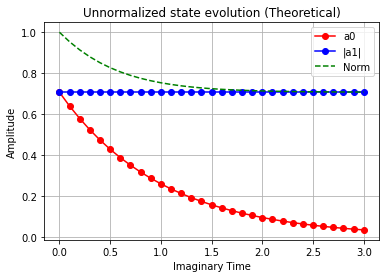

In [117]:
psi0 = np.array([1,1],dtype=complex)/np.sqrt(2)
norms = np.zeros(N+1)
norms[0] = np.linalg.norm(psi0)
def ev(psi):
    return np.array([psi[0]*np.exp(-db), psi[1]*np.exp(-1j*db)])
psis = np.zeros((N+1,2), dtype=complex)
psis[0] = psi0
for i in range(1,N+1):
    psis[i] = ev(psis[i-1])
    norms[i] = np.linalg.norm(psis[i]).real

import matplotlib.pyplot as plt
t = np.arange(N+1)*db
plt.title('Unnormalized state evolution (Theoretical)')
plt.plot(t, psis[:,0], 'ro-', label='a0')
plt.plot(t, np.abs(psis[:,1]), 'bo-', label='|a1|')
plt.plot(t, norms, 'g--', label='Norm')
plt.xlabel('Imaginary Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


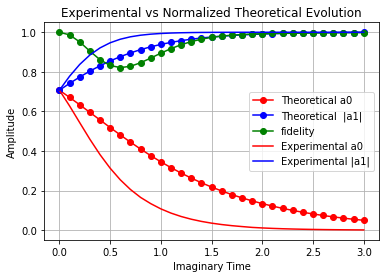

In [118]:
p = np.zeros((N+1,2))
npsis = psis.copy()
fids = np.zeros(N+1)
for i in range(N+1):
    npsis[i] = psis[i]/np.linalg.norm(psis[i])
    norms[i] = np.linalg.norm(npsis[i])
    p[i][0] = np.abs(npsis[i][0])**2
    p[i][1] = np.abs(npsis[i][1])**2
    
    fids[i] = np.abs(np.vdot(npsis[i], statevectors[i]))
    
    
plt.plot(t, npsis[:,0], 'ro-', label='Theoretical a0')
plt.plot(t, np.abs(npsis[:,1]), 'bo-', label='Theoretical  |a1|')
# plt.plot(t, norms, 'g--', label='Norm')
# plt.plot(t, p[:,0], 'r--', label='Theoretical  p0')
# plt.plot(t, p[:,1], 'b--', label='Theoretical  p1')
plt.plot(t, fids, 'go-', label='fidelity')
plt.plot(t, statevectors[:,0].real, 'r-', label='Experimental a0')
plt.plot(t, np.abs(statevectors[:,1]), 'b-', label='Experimental |a1|')
diffs = np.zeros(N+1)
for i in range(N+1):
    diffs[i] = np.linalg.norm(statevectors[i]-npsis[i])
# plt.plot(t, diffs, 'g--', label='|Diff|')
plt.title('Experimental vs Normalized Theoretical Evolution')
plt.xlabel('Imaginary Time')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.grid()
plt.show()

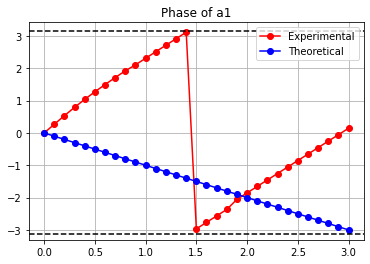

In [120]:
e_phase = np.angle(statevectors[:,1])
t_phase = np.angle(npsis[:,1])

plt.plot(t, e_phase, 'ro-', label='Experimental')
plt.plot(t, t_phase, 'bo-', label='Theoretical')
plt.axhline(y=np.pi, color='k', linestyle='--')
plt.axhline(y=-np.pi, color='k', linestyle='--')
plt.grid()
plt.title('Phase of a1')
plt.legend(loc='upper right')
plt.show()

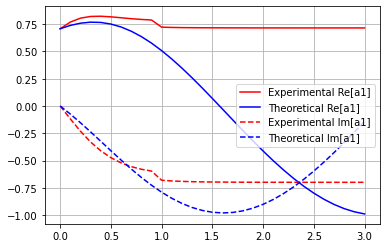

In [87]:
plt.plot(t,np.real(statevectors[:,1]), 'r-', label='Experimental Re[a1]')
plt.plot(t,np.real(npsis[:,1]), 'b-', label='Theoretical Re[a1]')
plt.plot(t,np.imag(statevectors[:,1]), 'r--', label='Experimental Im[a1]')
plt.plot(t,np.imag(npsis[:,1]), 'b--', label='Theoretical Im[a1]')

plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
hm = [ [0, 3], np.array([-1+1j, -1-1j], dtype=complex)/2, [0] ]
hm_list = [hm]
run_id = '002'

params.load_hamiltonian_params(hm_list, nbits, D)
params.set_run_params(db, delta, N, 0, sv_sim, init_circ, init_sv)
params.set_identifiers(log_path, fig_path, run_name)

E2,times2,statevectors2, alist2 = qite(params)

Loading Hamiltonian Parameters... Done
Calculating Unitary Domains... Done
Calculating Required Odd-Y Pauli Strings... Done
Calculating Required Pauli Measurements... Done
Starting Ideal QITE Simulation:
Iteration 1... Done -- Iteration time = 0.07 seconds
Iteration 2... Done -- Iteration time = 0.05 seconds
Iteration 3... Done -- Iteration time = 0.05 seconds
Iteration 4... 

C:\Users\CMP3KUMARS\Desktop\QITE\ideal_qite.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  E[0] = measure_energy(params, params.init_sv, params.hm_list)
C:\Users\CMP3KUMARS\Desktop\QITE\ideal_qite.py:205: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i] = measure_energy(params, psi, params.hm_list)


Done -- Iteration time = 0.05 seconds
Iteration 5... Done -- Iteration time = 0.05 seconds
Iteration 6... Done -- Iteration time = 0.05 seconds
Iteration 7... Done -- Iteration time = 0.05 seconds
Iteration 8... Done -- Iteration time = 0.05 seconds
Iteration 9... Done -- Iteration time = 0.05 seconds
Iteration 10... Done -- Iteration time = 0.05 seconds
Iteration 11... Done -- Iteration time = 0.06 seconds
Iteration 12... Done -- Iteration time = 0.07 seconds
Iteration 13... Done -- Iteration time = 0.08 seconds
Iteration 14... Done -- Iteration time = 0.10 seconds
Iteration 15... Done -- Iteration time = 0.07 seconds
Iteration 16... Done -- Iteration time = 0.09 seconds
Iteration 17... Done -- Iteration time = 0.07 seconds
Iteration 18... Done -- Iteration time = 0.08 seconds
Iteration 19... Done -- Iteration time = 0.07 seconds
Iteration 20... Done -- Iteration time = 0.06 seconds
Iteration 21... Done -- Iteration time = 0.06 seconds
Iteration 22... Done -- Iteration time = 0.06 sec

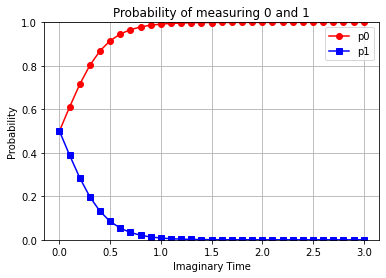

In [48]:
plt.plot(np.arange(N+1)*db, np.abs(statevectors2[:,0])**2, 'ro-', label='p0')
plt.plot(np.arange(N+1)*db, np.abs(statevectors2[:,1])**2, 'bs-', label='p1')
plt.title('Probability of measuring 0 and 1')
plt.ylim(0,1)
plt.grid()
plt.xlabel('Imaginary Time')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.show()

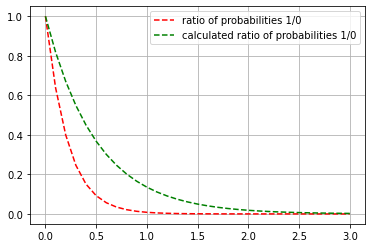

In [56]:
b0 = np.array([np.sqrt(0.5)]*(N+1), dtype=complex)
b1 = np.array([np.sqrt(0.5)]*(N+1), dtype=complex)

for i in range(N+1):
    b0[i] *= np.exp(t[i])
    b1[i] *= np.exp(-1j*t[i])
    norm = np.abs(b0[i])**2 + np.abs(b1[i])**2
    b0[i] /= norm
    b1[i] /= norm

plt.plot(t, np.abs(statevectors2[:,1]/statevectors2[:,0])**2, 'r--', label='ratio of probabilities 1/0')
plt.plot(t, np.abs(b1/b0)**2, 'g--', label='calculated ratio of probabilities 1/0')
plt.grid()
plt.legend()
plt.show()